In [1]:
import torch, torch.nn as nn, torch.functional as F
from torch import optim
import numpy as np
import torchvision
from tqdm import tqdm
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import matplotlib.pyplot as plt
from model import *
%load_ext autoreload
%autoreload 2

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
dataset_path = Path("/mnt/datasets/urob/pets")
dataset = PetsDataset(dataset_path)

In [4]:
val_set_coef = 0.1
trainset_size = int(len(dataset) - val_set_coef * len(dataset))
trainset, validset = torch.utils.data.random_split(dataset, [trainset_size, len(dataset) - trainset_size])
print(f"trainset_sz={len(trainset)}, validset_sz={len(validset)}")


trainset_sz=5948, validset_sz=661


In [5]:
train_loader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)
valid_loader = DataLoader(validset, batch_size=64, shuffle=True, num_workers=4)

In [6]:
model = Net().to(device)
print(model)

Net(
  (encoder): Encoder(
    (enc_blocks): ModuleList(
      (0): ConvBlock(
        (layer): Sequential(
          (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU()
        )
      )
      (1): ConvBlock(
        (layer): Sequential(
          (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU()
        )
      )
      (2): Con

In [8]:

# class_weights_species = torch.tensor([1.0, 2.1]).to(device)
# class_weights_mask = torch.tensor([1.0, 1.0, 2.0]).to(device)
breed_criterion = nn.CrossEntropyLoss()
mask_criterion = nn.CrossEntropyLoss()#(weight=class_weights_mask)
species_criterion = nn.CrossEntropyLoss()#(weight=class_weights_species)
#species_criterion = FocalLoss(gamma=2.0, alpha=[1.0, 2.0])
#breed_criterion = FocalLoss(gamma=2.0)
#mask_criterion = FocalLoss(gamma=2.0, alpha=[1.0, 2.0, 4.0])

species_criterion = species_criterion.to(device)
breed_criterion = breed_criterion.to(device)
mask_criterion = mask_criterion.to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.7)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

In [9]:

train(model, train_loader, valid_loader, optimizer, breed_criterion, species_criterion, mask_criterion, 20, scheduler)

epoch=0: 100%|██████████| 93/93 [00:21<00:00,  4.35it/s, total ss=4.07, breed_loss=2.93, species_loss=0.452, masks_loss=0.69] 


Validation:


Species accuracy:0.7013663649559021, breed accuracy:0.13933983445167542, top 3 breed accuracy:0.32000812888145447
 mask metrics:{'iou': tensor(0.4324, device='cuda:0'), 'min_iou': tensor(0.1056, device='cuda:0'), 'precision': tensor(0.6475, device='cuda:0'), 'recall': tensor(0.5644, device='cuda:0')}


epoch=1: 100%|██████████| 93/93 [00:20<00:00,  4.44it/s, total ss=3.26, breed_loss=2.35, species_loss=0.376, masks_loss=0.533]


Validation:


Species accuracy:0.7709686160087585, breed accuracy:0.18222403526306152, top 3 breed accuracy:0.4184253513813019
 mask metrics:{'iou': tensor(0.4514, device='cuda:0'), 'min_iou': tensor(0.2426, device='cuda:0'), 'precision': tensor(0.6493, device='cuda:0'), 'recall': tensor(0.5939, device='cuda:0')}


epoch=2: 100%|██████████| 93/93 [00:21<00:00,  4.43it/s, total ss=2.99, breed_loss=2.16, species_loss=0.273, masks_loss=0.56] 


Validation:


Species accuracy:0.7710362672805786, breed accuracy:0.21617965400218964, top 3 breed accuracy:0.42816558480262756
 mask metrics:{'iou': tensor(0.5187, device='cuda:0'), 'min_iou': tensor(0.3159, device='cuda:0'), 'precision': tensor(0.6755, device='cuda:0'), 'recall': tensor(0.6812, device='cuda:0')}


epoch=3: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=2.97, breed_loss=2.2, species_loss=0.255, masks_loss=0.514] 


Validation:


Species accuracy:0.8165584206581116, breed accuracy:0.337256520986557, top 3 breed accuracy:0.6347402930259705
 mask metrics:{'iou': tensor(0.5608, device='cuda:0'), 'min_iou': tensor(0.3017, device='cuda:0'), 'precision': tensor(0.7392, device='cuda:0'), 'recall': tensor(0.6826, device='cuda:0')}


epoch=4: 100%|██████████| 93/93 [00:21<00:00,  4.43it/s, total ss=2.13, breed_loss=1.48, species_loss=0.146, masks_loss=0.508]


Validation:


Species accuracy:0.779423713684082, breed accuracy:0.3386093080043793, top 3 breed accuracy:0.576231062412262
 mask metrics:{'iou': tensor(0.5375, device='cuda:0'), 'min_iou': tensor(0.2766, device='cuda:0'), 'precision': tensor(0.7367, device='cuda:0'), 'recall': tensor(0.6578, device='cuda:0')}


epoch=5: 100%|██████████| 93/93 [00:21<00:00,  4.40it/s, total ss=2.17, breed_loss=1.58, species_loss=0.141, masks_loss=0.452]  


Validation:


Species accuracy:0.8762852549552917, breed accuracy:0.41233766078948975, top 3 breed accuracy:0.661255419254303
 mask metrics:{'iou': tensor(0.6077, device='cuda:0'), 'min_iou': tensor(0.3637, device='cuda:0'), 'precision': tensor(0.7500, device='cuda:0'), 'recall': tensor(0.7334, device='cuda:0')}


epoch=6: 100%|██████████| 93/93 [00:21<00:00,  4.39it/s, total ss=1.55, breed_loss=1.06, species_loss=0.0689, masks_loss=0.418] 


Validation:


Species accuracy:0.8676271438598633, breed accuracy:0.31310877203941345, top 3 breed accuracy:0.5773809552192688
 mask metrics:{'iou': tensor(0.5911, device='cuda:0'), 'min_iou': tensor(0.3786, device='cuda:0'), 'precision': tensor(0.7415, device='cuda:0'), 'recall': tensor(0.7355, device='cuda:0')}


epoch=7: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=0.804, breed_loss=0.329, species_loss=0.0701, masks_loss=0.405]


Validation:


Species accuracy:0.8875811696052551, breed accuracy:0.48795995116233826, top 3 breed accuracy:0.7225378751754761
 mask metrics:{'iou': tensor(0.6389, device='cuda:0'), 'min_iou': tensor(0.3903, device='cuda:0'), 'precision': tensor(0.7813, device='cuda:0'), 'recall': tensor(0.7543, device='cuda:0')}


epoch=8: 100%|██████████| 93/93 [00:21<00:00,  4.40it/s, total ss=0.655, breed_loss=0.226, species_loss=0.028, masks_loss=0.401]   


Validation:


Species accuracy:0.8903544545173645, breed accuracy:0.47362011671066284, top 3 breed accuracy:0.725581705570221
 mask metrics:{'iou': tensor(0.6390, device='cuda:0'), 'min_iou': tensor(0.3776, device='cuda:0'), 'precision': tensor(0.7873, device='cuda:0'), 'recall': tensor(0.7486, device='cuda:0')}


epoch=9: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=0.565, breed_loss=0.0863, species_loss=0.0673, masks_loss=0.412] 


Validation:


Species accuracy:0.8933306932449341, breed accuracy:0.4895157217979431, top 3 breed accuracy:0.7440476417541504
 mask metrics:{'iou': tensor(0.6388, device='cuda:0'), 'min_iou': tensor(0.3968, device='cuda:0'), 'precision': tensor(0.7800, device='cuda:0'), 'recall': tensor(0.7549, device='cuda:0')}


epoch=10: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=0.503, breed_loss=0.101, species_loss=0.0185, masks_loss=0.383]  


Validation:


Species accuracy:0.88764888048172, breed accuracy:0.4949946105480194, top 3 breed accuracy:0.7297078371047974
 mask metrics:{'iou': tensor(0.6613, device='cuda:0'), 'min_iou': tensor(0.4112, device='cuda:0'), 'precision': tensor(0.7941, device='cuda:0'), 'recall': tensor(0.7735, device='cuda:0')}


epoch=11: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=0.363, breed_loss=0.032, species_loss=0.00294, masks_loss=0.328] 


Validation:


Species accuracy:0.8747970461845398, breed accuracy:0.4623241424560547, top 3 breed accuracy:0.6912202835083008
 mask metrics:{'iou': tensor(0.6613, device='cuda:0'), 'min_iou': tensor(0.4052, device='cuda:0'), 'precision': tensor(0.8003, device='cuda:0'), 'recall': tensor(0.7681, device='cuda:0')}


epoch=12: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=0.422, breed_loss=0.0376, species_loss=0.0326, masks_loss=0.351]  


Validation:


Species accuracy:0.8734443187713623, breed accuracy:0.4878923296928406, top 3 breed accuracy:0.7343074083328247
 mask metrics:{'iou': tensor(0.6697, device='cuda:0'), 'min_iou': tensor(0.4147, device='cuda:0'), 'precision': tensor(0.8052, device='cuda:0'), 'recall': tensor(0.7749, device='cuda:0')}


epoch=13: 100%|██████████| 93/93 [00:21<00:00,  4.41it/s, total ss=0.389, breed_loss=0.0326, species_loss=0.00696, masks_loss=0.349] 


Validation:


Species accuracy:0.8904220461845398, breed accuracy:0.4567776322364807, top 3 breed accuracy:0.6941288113594055
 mask metrics:{'iou': tensor(0.6566, device='cuda:0'), 'min_iou': tensor(0.4103, device='cuda:0'), 'precision': tensor(0.7978, device='cuda:0'), 'recall': tensor(0.7658, device='cuda:0')}


epoch=14: 100%|██████████| 93/93 [00:21<00:00,  4.42it/s, total ss=0.328, breed_loss=0.00927, species_loss=0.0264, masks_loss=0.292]  


Validation:


Species accuracy:0.897524356842041, breed accuracy:0.5121753811836243, top 3 breed accuracy:0.7383658289909363
 mask metrics:{'iou': tensor(0.6687, device='cuda:0'), 'min_iou': tensor(0.4272, device='cuda:0'), 'precision': tensor(0.7980, device='cuda:0'), 'recall': tensor(0.7832, device='cuda:0')}


epoch=15: 100%|██████████| 93/93 [00:21<00:00,  4.40it/s, total ss=0.355, breed_loss=0.00938, species_loss=0.000808, masks_loss=0.345]


Validation:


Species accuracy:0.9175460338592529, breed accuracy:0.5122429728507996, top 3 breed accuracy:0.732548713684082
 mask metrics:{'iou': tensor(0.6802, device='cuda:0'), 'min_iou': tensor(0.4380, device='cuda:0'), 'precision': tensor(0.8065, device='cuda:0'), 'recall': tensor(0.7900, device='cuda:0')}


epoch=16: 100%|██████████| 93/93 [00:21<00:00,  4.39it/s, total ss=0.313, breed_loss=0.00591, species_loss=0.00379, masks_loss=0.303] 


Validation:


Species accuracy:0.9117288589477539, breed accuracy:0.5021644830703735, top 3 breed accuracy:0.7439799904823303
 mask metrics:{'iou': tensor(0.6642, device='cuda:0'), 'min_iou': tensor(0.4091, device='cuda:0'), 'precision': tensor(0.8089, device='cuda:0'), 'recall': tensor(0.7670, device='cuda:0')}


epoch=17: 100%|██████████| 93/93 [00:21<00:00,  4.39it/s, total ss=0.301, breed_loss=0.00257, species_loss=0.000349, masks_loss=0.298]


Validation:


Species accuracy:0.9175460338592529, breed accuracy:0.49763259291648865, top 3 breed accuracy:0.738095223903656
 mask metrics:{'iou': tensor(0.6887, device='cuda:0'), 'min_iou': tensor(0.4433, device='cuda:0'), 'precision': tensor(0.8133, device='cuda:0'), 'recall': tensor(0.7943, device='cuda:0')}


epoch=18: 100%|██████████| 93/93 [00:21<00:00,  4.42it/s, total ss=0.334, breed_loss=0.00327, species_loss=0.0413, masks_loss=0.289]  


Validation:


Species accuracy:0.9059118032455444, breed accuracy:0.5090638399124146, top 3 breed accuracy:0.755005419254303
 mask metrics:{'iou': tensor(0.6911, device='cuda:0'), 'min_iou': tensor(0.4492, device='cuda:0'), 'precision': tensor(0.8118, device='cuda:0'), 'recall': tensor(0.7982, device='cuda:0')}


epoch=19: 100%|██████████| 93/93 [00:21<00:00,  4.39it/s, total ss=0.3, breed_loss=0.00361, species_loss=0.0235, masks_loss=0.273]    


Validation:


Species accuracy:0.9260011315345764, breed accuracy:0.5221185684204102, top 3 breed accuracy:0.7511498928070068
 mask metrics:{'iou': tensor(0.6866, device='cuda:0'), 'min_iou': tensor(0.4442, device='cuda:0'), 'precision': tensor(0.8102, device='cuda:0'), 'recall': tensor(0.7943, device='cuda:0')}


In [11]:
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
train(model, train_loader, valid_loader, optimizer, breed_criterion, species_criterion, mask_criterion, 1, scheduler)

epoch=0: 100%|██████████| 93/93 [00:21<00:00,  4.40it/s, total ss=0.24, breed_loss=0.000971, species_loss=0.000192, masks_loss=0.239] 


Validation:


Species accuracy:0.9288420677185059, breed accuracy:0.5151515007019043, top 3 breed accuracy:0.7596049904823303
 mask metrics:{'iou': tensor(0.6908, device='cuda:0'), 'min_iou': tensor(0.4518, device='cuda:0'), 'precision': tensor(0.8099, device='cuda:0'), 'recall': tensor(0.8000, device='cuda:0')}


In [12]:
total_params = sum(
        param.numel() for param in model.parameters()
    )
total_params

11946298

In [13]:

torch.save(model.state_dict(), "weights.pth")


In [66]:
device = "cpu"
model = model.to(device)

In [71]:
images, species_labels, breed_labels, masks = next(iter(valid_loader))
images = images.to(device)
species_preds = []
breed_preds = []
mask_preds = []
for img in images[-8:]:
    species_pred, breed_pred, mask_pred = model.predict(img)
    species_preds.append(species_pred)
    breed_preds.append(breed_pred)
    mask_preds.append(mask_pred)
mask_preds = torch.stack(mask_preds).to(device)
print(mask_preds.size())

torch.Size([8, 128, 128])


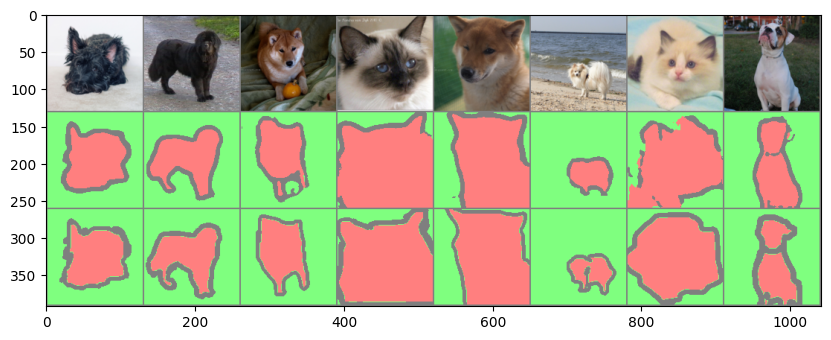

['dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog']
[('scottish_terrier', 'British_Shorthair', 'english_cocker_spaniel'), ('newfoundland', 'havanese', 'staffordshire_bull_terrier'), ('shiba_inu', 'pomeranian', 'beagle'), ('Birman', 'keeshond', 'Siamese'), ('pomeranian', 'shiba_inu', 'american_pit_bull_terrier'), ('staffordshire_bull_terrier', 'havanese', 'beagle'), ('Ragdoll', 'pomeranian', 'Birman'), ('Sphynx', 'shiba_inu', 'american_bulldog')]


In [74]:
from torchvision.utils import make_grid

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def mask_to_img(mask):
    mask_img = torch.zeros((mask.shape[0], 128, 128, 3)).to(device)
    mask_img[mask == 0] = torch.tensor([1., 0., 0.], device=device)
    mask_img[mask == 1] = torch.tensor([0., 1., 0.], device=device)
    mask_img = mask_img.permute(0, 3, 1, 2)
    return mask_img

to_viz = torch.cat([images[-8:], mask_to_img(mask_preds), mask_to_img(masks[-8:])], dim=0)

imshow(make_grid(to_viz))
print(species_preds)
print(breed_preds)